## Performance Metrics - Facebook 's page

### Goal: 
Predict the Reach, Impression and Total interaction of a publication with the predictors available on dataset.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Overview & Preprocessing

In [2]:
df = pd.read_csv('dataset_Facebook.csv', delimiter=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Some of the columns's names are too long, it will be necessary to renamed them with a shorter label for a better manipulation.

Below are the renamed columns: 

- Lifetime Post Total Reach -> Reach 
- Lifetime Post Total Impressions  -> Impressions
- Lifetime Post Reach by People who like your page -> Reach_ByLiked
- Lifetime Post Impressions by people who have liked your page -> Impressions_ByLiked
- Lifetime Engaged Users -> Engaged
- Lifetime People who have liked your page and engaged with your post -> Engaged_ByLiked

The name chose to renamed the colums were inspired by the work of Rajiv2806. See reference here.

In [3]:
df = df.rename(columns\
               ={'Lifetime Post Total Reach':'Reach',
                 'Lifetime Post reach by people who like your Page':'Reach_ByLiked',
                 'Lifetime Post Impressions by people who have liked your Page':'Impressions_ByLiked',
                 'Lifetime Engaged Users':'Engaged',
                 'Lifetime Post Total Impressions':'Impressions',
                 'Lifetime People who have liked your Page and engaged with your post':'Engaged_ByLiked'
                  })

In [58]:
df.info() #List of the features and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes              500 non-null int64
Type                          500 non-null object
Category                      500 non-null int64
Post Month                    500 non-null int64
Post Weekday                  500 non-null int64
Post Hour                     500 non-null int64
Paid                          500 non-null bool
Reach                         500 non-null int64
Impressions                   500 non-null int64
Engaged                       500 non-null int64
Lifetime Post Consumers       500 non-null int64
Lifetime Post Consumptions    500 non-null int64
Impressions_ByLiked           500 non-null int64
Reach_ByLiked                 500 non-null int64
Engaged_ByLiked               500 non-null int64
comment                       500 non-null int64
like                          499 non-null float64
share                         496 non-null float64
Total Int

If we check the list of the features, we can find that most of the columns are assigned to the correct data types however we might need to convert the data type of the column 'Paid' to boolean and assigned the value 1.0 to True and the value 0.0 to False.

####  Paid Publications $$$ 

In [5]:
df['Paid'] = df['Paid'].astype(bool)

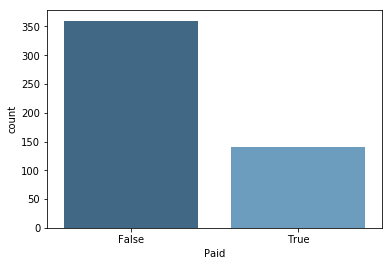

In [53]:
sns.countplot(df['Paid', palette='Blues_d')

140 out of 500 were paid publications. 

#### Category of Publications

In [7]:
df['Category'].value_counts()

1    215
3    155
2    130
Name: Category, dtype: int64

The column 'Category' has a categorical value distribution and each value represent a type of facebook's post labelled as below: 
- Value [1] = Action 
- Value [2] = Product
- Value [3] = Inspiration

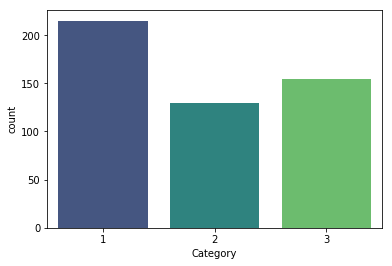

In [56]:
sns.countplot(df['Category'],palette='viridis')

#### Distributions of the Posts

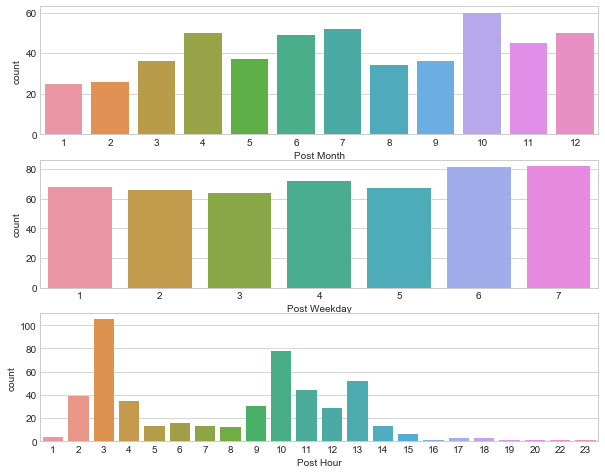

In [135]:
sns.set_palette('Set1')
fig, axes =plt.subplots(3,1)
fig.set_size_inches(10, 8)
sns.countplot(df['Post Month'], ax=axes[0])
sns.countplot(df['Post Weekday'], ax=axes[1])
sns.countplot(df['Post Hour'], ax=axes[2])

#### Cross Analysis - Total Interactions vs Time

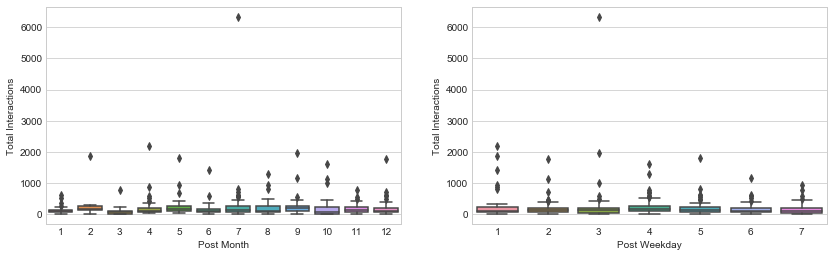

In [162]:
sns.set_palette('Set1')
fig, axes =plt.subplots(1,2)
fig.set_size_inches(14,4)
sns.boxplot(x='Post Month', y='Total Interactions', data=df, ax=axes[0])
sns.boxplot(x='Post Weekday', y='Total Interactions', data=df, ax=axes[1])

(0, 1000)

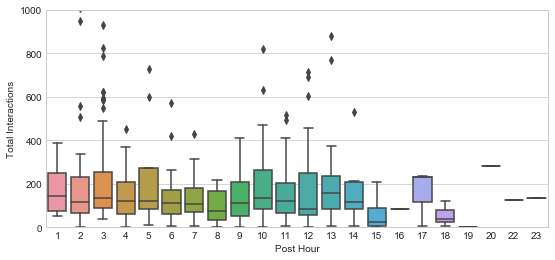

In [159]:
plt.figure(figsize=(9,4))
sns.boxplot(x='Post Hour', y='Total Interactions', data=df)
plt.ylim(0,1000)

### Dummy Variables

List of the categorical variables in the dataset: 
    - Type
    - Category
    - Paid
    - Post Month
    - Post Weekday
    - Post Hour

In [25]:
#Lets create the dummy variables for each of these 3 variables
dum = pd.get_dummies(df, columns=['Type', 'Category', 'Paid', 'Post Month',
                                  'Post Weekday', 'Post Hour'], drop_first=True)
dum.dtypes

Page total likes                int64
Reach                           int64
Impressions                     int64
Engaged                         int64
Lifetime Post Consumers         int64
Lifetime Post Consumptions      int64
Impressions_ByLiked             int64
Reach_ByLiked                   int64
Engaged_ByLiked                 int64
comment                         int64
like                          float64
share                         float64
Total Interactions              int64
Type_Photo                      uint8
Type_Status                     uint8
Type_Video                      uint8
Category_2                      uint8
Category_3                      uint8
Paid_True                       uint8
Post Month_2                    uint8
Post Month_3                    uint8
Post Month_4                    uint8
Post Month_5                    uint8
Post Month_6                    uint8
Post Month_7                    uint8
Post Month_8                    uint8
Post Month_9

Let's specify the features that we will use as indepedant variables(Prior a publication) and the features that will be the dependant variables(Post publication).
#### Inputs: 

- Type 
- Category 
- Post Month  
- Post Weekday  
- Post Hour
- Paid

#### Outputs:
- Total Interactions
- Reach 
- Impressions 

Let's now created a new dataframe which will only have the inputs columns and the outputs columns.

In [60]:
final_df = dum.drop(['Engaged','Lifetime Post Consumers',
                    'Lifetime Post Consumptions', 'Impressions_ByLiked',
                    'Reach_ByLiked', 'Engaged_ByLiked','comment', 'like', 'share'],
                     axis='columns')

In [61]:
final_df.head(3)

,Page total likes,Reach,Impressions,Total Interactions,Type_Photo,Type_Status,Type_Video,Category_2,Category_3,Paid_True,...,Post Hour_13,Post Hour_14,Post Hour_15,Post Hour_16,Post Hour_17,Post Hour_18,Post Hour_19,Post Hour_20,Post Hour_22,Post Hour_23
0,139441,2752,5091,100,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,139441,10460,19057,164,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,139441,2413,4373,80,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
final_df.shape

(500, 48)

### Model 1

#### Multicollinearity Analysis

KeyError: 'Post Month'

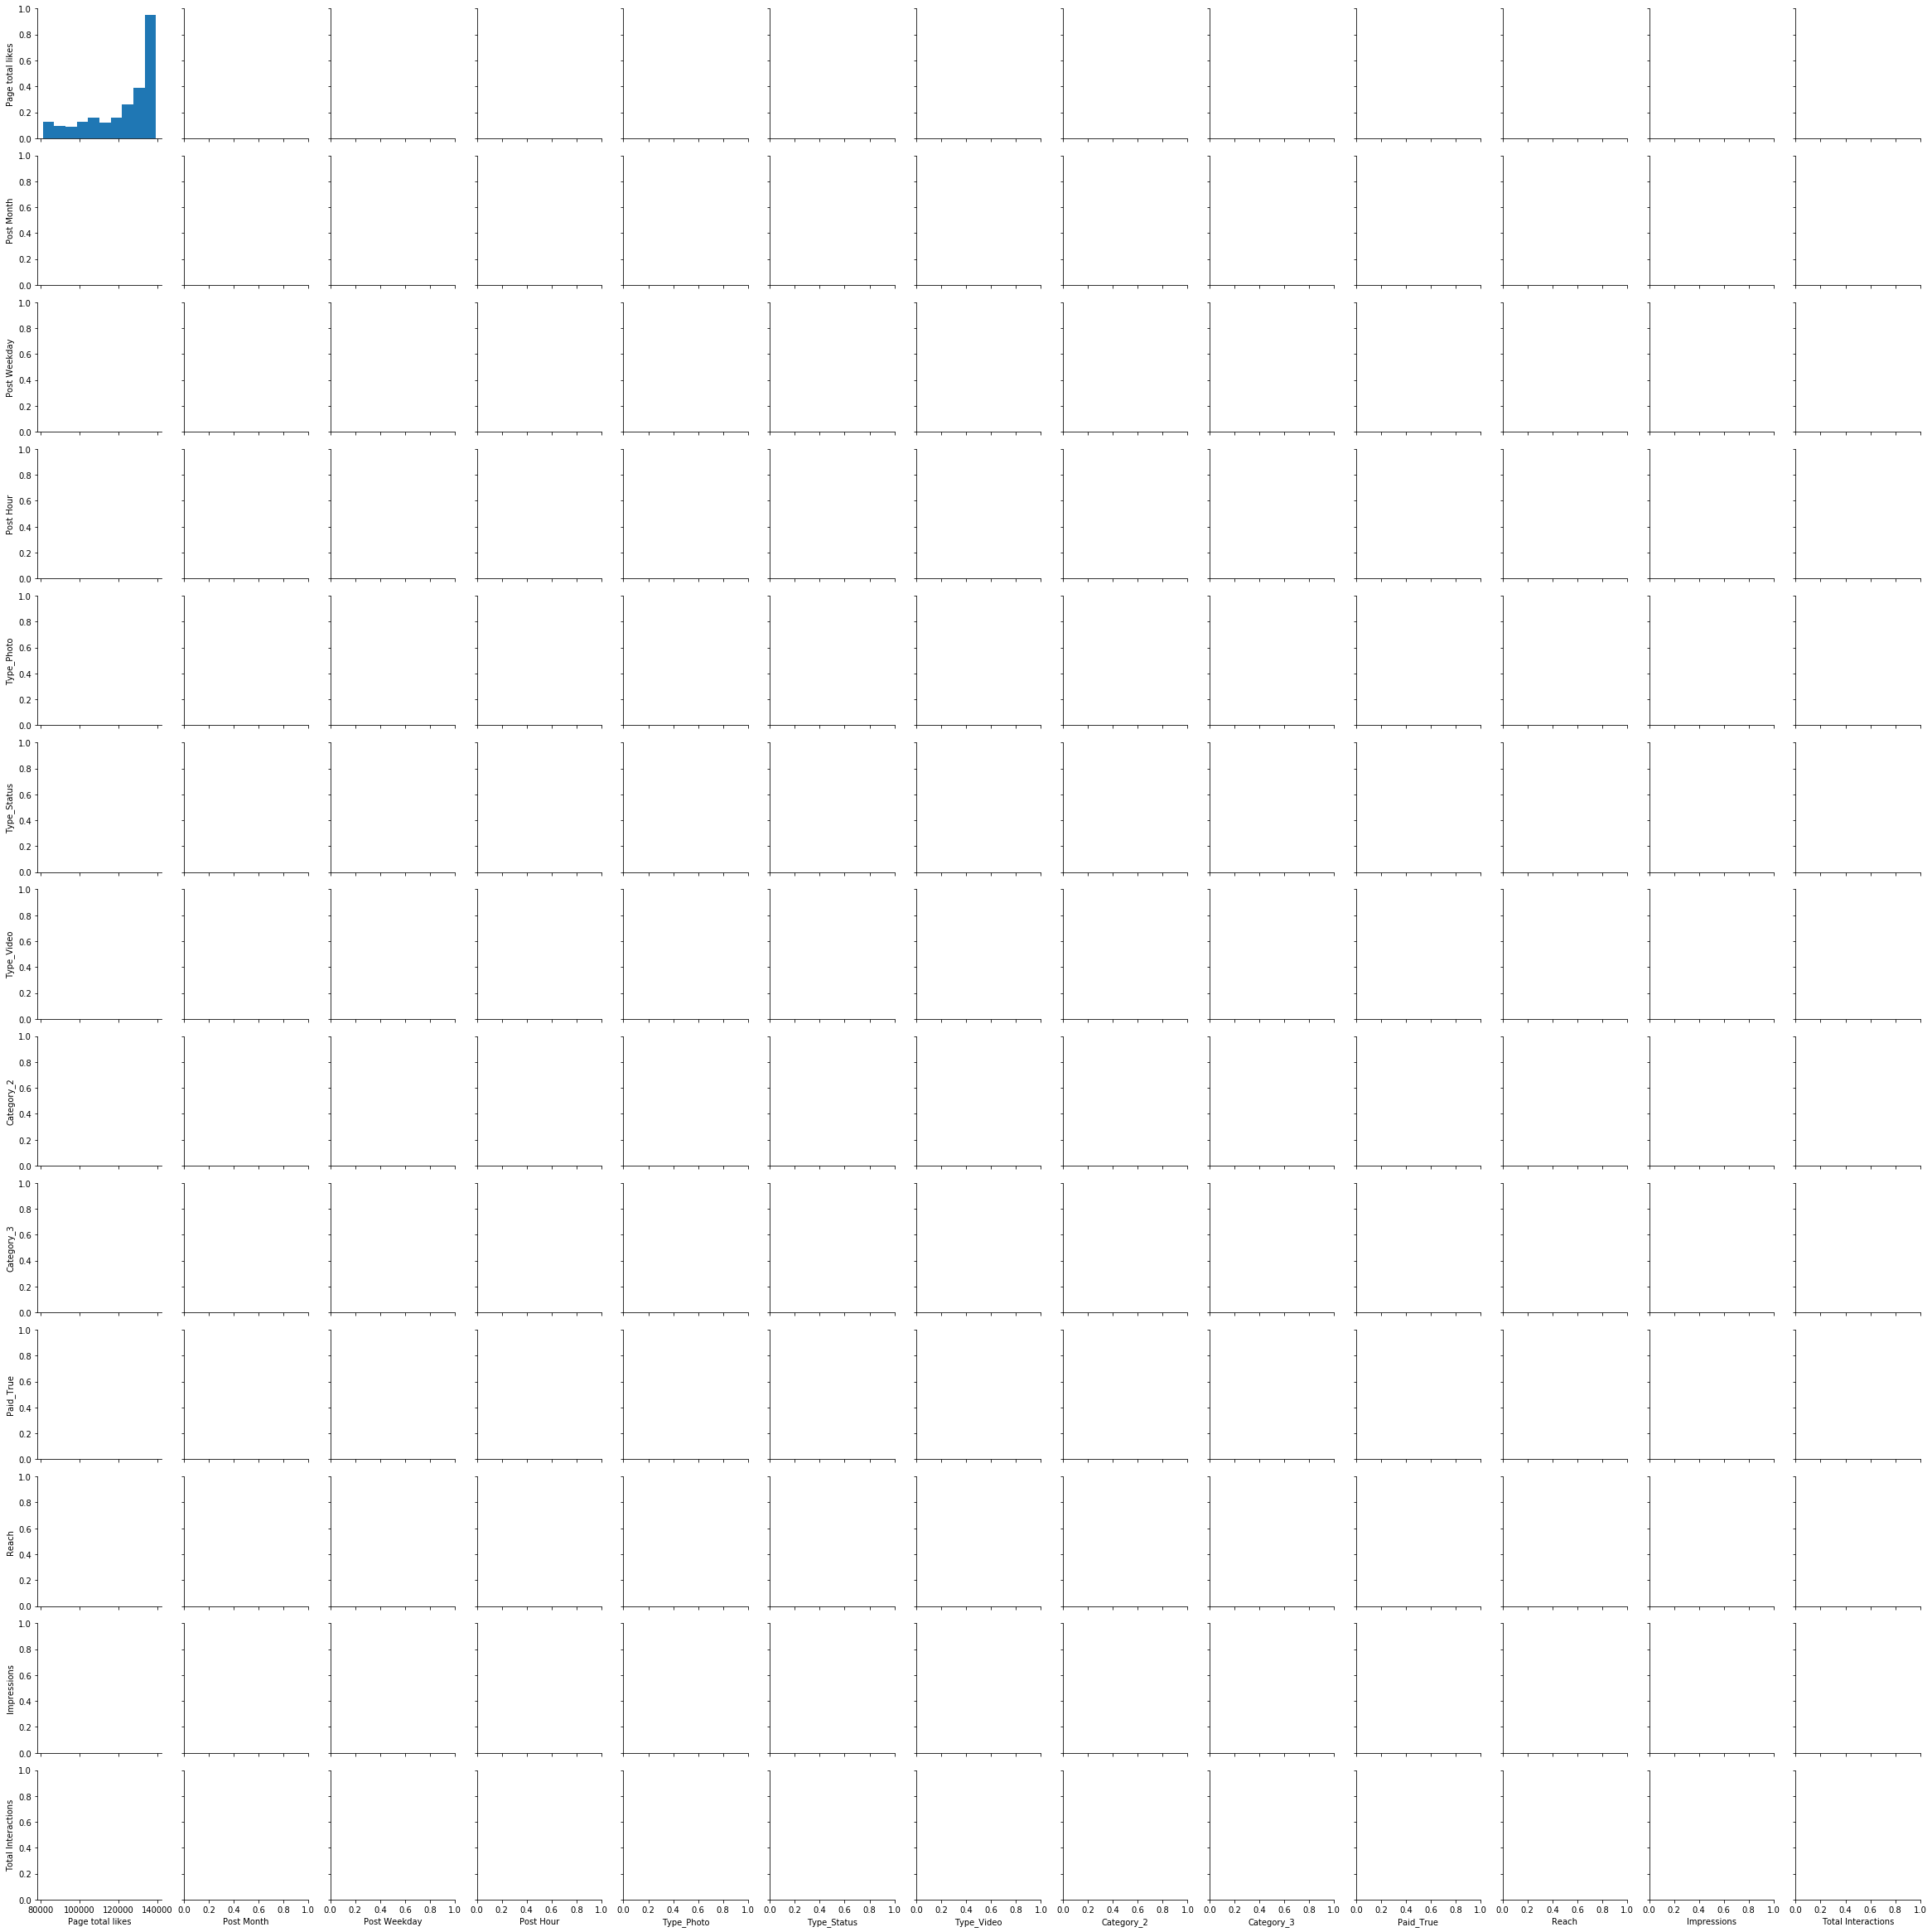

In [63]:
#sns.pairplot(final_df, vars=['Page total likes','Post Month','Post Weekday','Post Hour',
                            #'Type_Photo', 'Type_Status','Type_Video', 
                            #'Category_2', 'Category_3', 'Paid_True',
                            #'Reach', 'Impressions', 'Total Interactions'])

The pairplot shows clearly that there is no multicollinearity between the dependants variables, so we good to implement all of them in our regression model, however there is no collinearity as well between the predictors and the dependants variables and this is an issue as it invalidates one of the 4 regression linearity assumptions. 

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
X = final_df.drop(['Reach', 'Impressions', 'Total Interactions'],axis='columns')
X.head() #Independants variables

,Page total likes,Post Month,Post Weekday,Post Hour,Type_Photo,Type_Status,Type_Video,Category_2,Category_3,Paid_True
0,139441,12,4,3,1,0,0,1,0,0
1,139441,12,3,10,0,1,0,1,0,0
2,139441,12,3,3,1,0,0,0,1,0
3,139441,12,2,10,1,0,0,1,0,1
4,139441,12,2,3,1,0,0,1,0,0


In [17]:
y = final_df.loc[:, ['Reach', 'Impressions', 'Total Interactions']]

In [18]:
y.head() #Dependants variables

,Reach,Impressions,Total Interactions
0,2752,5091,100
1,10460,19057,164
2,2413,4373,80
3,50128,87991,1777
4,7244,13594,393


In [19]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Let's predict now the Reach, Impressions, and the total interactions of a publication that has these parameters below: 
- An Unpaid product picture posted on the brand's page during the month of December on a Wednesday at 3am.   

In [20]:
model.predict([[139441,12,4,3,1,0,0,1,0,0]])  

array([[1847.05691188, 4165.13916717,  241.31057836]])

In [21]:
model.score(X,y)

0.04879210296603229

### Model 2